<a href="https://colab.research.google.com/github/dprobity/machinelearning/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook Imports and Packages


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

$$f(x) = x^2 + x + 1$$


In [97]:
def f(x):
    return x**2 + x**1 + 1

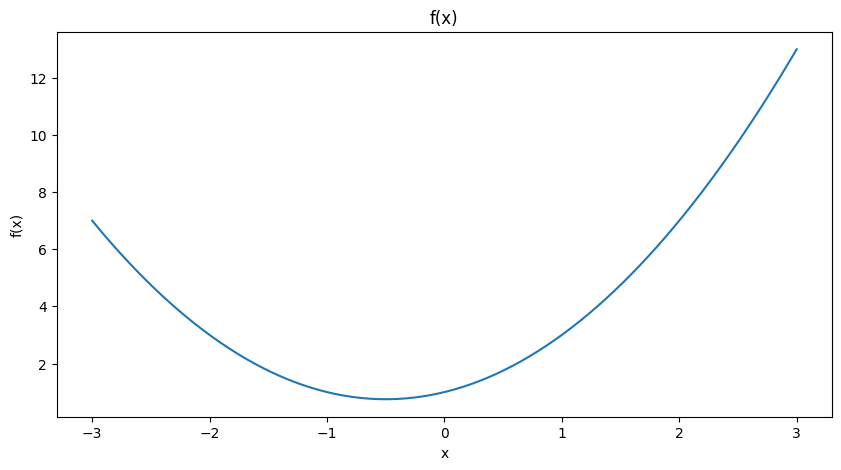

In [98]:
x_1 = np.linspace(start=-3, stop=3, num=500)

plt.figure(figsize=(10, 5))
# plt.scatter(x_1, f(x_1))
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

In [99]:
def slope(x):
  return 2*x + 1


slope(2)

5

# $d(x^n)/dx = n.x^n-1$

Plot the function and the derivative side by side


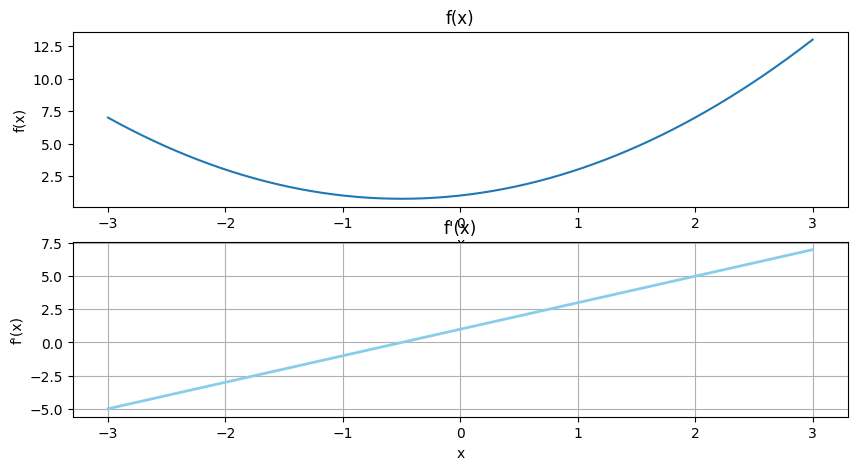

In [100]:
x_1 = np.linspace(start=-3, stop=3, num=500)

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
# plt.scatter(x_1, f(x_1))
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x_1, f(x_1))

plt.subplot(2, 1, 2)
plt.title("f'(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.plot(x_1, slope(x_1), c='skyblue', linewidth=2)
plt.grid()
plt.show()

## Python loops & Gradient Descent

In [101]:
# python Loop


for n in range(5):
  print('Hello World', n)
  print(n**2)
print('End loop')

Hello World 0
0
Hello World 1
1
Hello World 2
4
Hello World 3
9
Hello World 4
16
End loop


In [102]:
# python while loop

countter = 0

while countter < 5:
  print('Hello World', countter)
  print(countter**2)
  countter += 1
print('End of waiting tine Ready or not, here I come')

Hello World 0
0
Hello World 1
1
Hello World 2
4
Hello World 3
9
Hello World 4
16
End of waiting tine Ready or not, here I come


# Gradient Decsent


In [103]:
import numpy as np

def f(x):
    x=np.array(x)
    return x**2 + x + 1



def df(x):
  x=np.array(x)
  return 2*x + 1




In [104]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
max_iterations = 170
precision = 0.0001
step_size = abs(new_x - previous_x)


x_lst = []
slope_lst = []
cost_lst = []


for n in range(max_iterations):
  previous_x = new_x
  gradient = df(previous_x)
  new_x = previous_x - step_multiplier * df(previous_x)
  x_lst.append(new_x)
  slope_lst.append(gradient)
  cost_lst.append(f(new_x))
  step_size = abs(new_x - previous_x)
  #print(n, "...............",step_size)

  if step_size < precision:
    break


print(n, step_size)

print('Local minimum occurs at x:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

40 9.304595970494045e-05
Local minimum occurs at x: -0.49962781616118024
Slope or df(x) value at this point is: 0.0007443676776395236
f(x) value or cost at this point is: 0.7500001385208099


#Superimpose the gradient descent chart

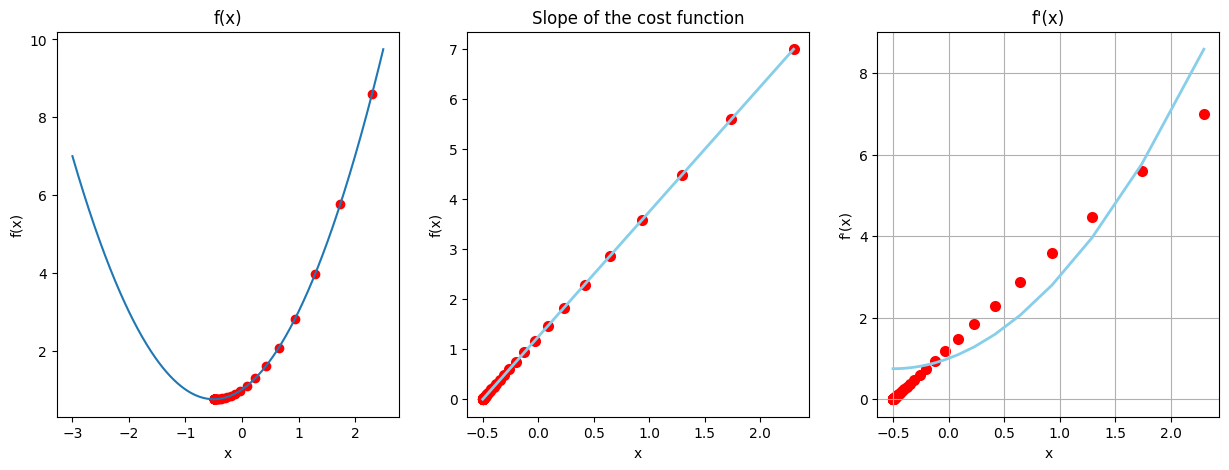

In [119]:
x_plot = np.linspace(start=-3, stop=2.5, num=500)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# plt.scatter(x_1, f(x_1))
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x_plot, f(x_plot))
plt.scatter(x_lst,cost_lst, alpha=1, c='r')



plt.subplot(1, 3, 2)
# plt.scatter(x_1, f(x_1))
plt.title("Slope of the cost function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x_lst,slope_lst, c='skyblue', linewidth=2)
plt.scatter(x_lst,slope_lst, c='r', linewidth=2, alpha=1)


plt.subplot(1, 3, 3)
plt.title("f'(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.plot(x_lst,cost_lst, c='skyblue', linewidth=2)
plt.scatter(x_lst,slope_lst, c='r', linewidth=2, alpha=1)

plt.grid()
plt.show()